/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


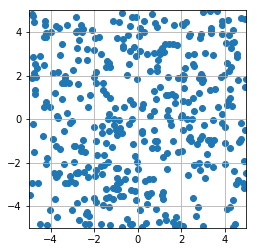

In [1]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
N = 400 
L = 10
Lmin=-L/2
Lmax = L/2
V = L*L
coords=numpy.random.uniform(low=Lmin, high=Lmax, size=(N,2))
dr = 0.01

plt.scatter(coords[:,0],coords[:,1])
plt.xlim([Lmin,Lmax])
plt.ylim([Lmin,Lmax])
plt.grid()
plt.axes().set_aspect("equal")

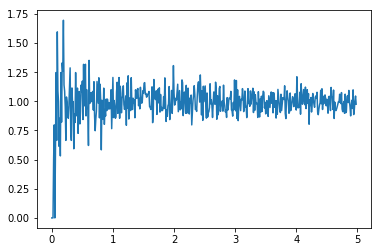

In [2]:
def pbc(d,L):0
    return d - L * ((d+(L/2)//L)

def rdf(coords,L,dr):
    rmax = L/2
    nbins = int(rmax//dr)
    r = numpy.array([i*dr for i in range(nbins)])    
    bins = numpy.zeros(nbins)
    for i,a in enumerate(coords[:-1]):#all but the last
        for b in coords[i+1:]:
            delta = b-a
            for h in range(2):
                delta[h] = pbc(delta[h],L)
            d = numpy.absolute(numpy.linalg.norm(delta))
            index = int(d//dr)
            if index<nbins:
                bins[index] += 1 
    for i, b in enumerate(bins):
        bins[i] /= N*(N-1)*numpy.pi*(2*dr*(i+1)*dr)/(2*V) #normalize by volume of annulus AND number of pairs
    #Note: Number of Pairs is N*(N-1)/2 (Sum of numbers from 1 to N-1)    
        
    return r, bins
r,bins = rdf(coords, L, dr)
plt.plot(r,bins)